In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("/content/drive/MyDrive/MeerutWorking/Social_Network_Ads.csv")

In [9]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
data.shape

(400, 5)

In [12]:
data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [14]:
df = data[['Age','EstimatedSalary','Purchased']]

In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
X.iloc[:5,:]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled.shape

(400, 2)

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [23]:
X_scaled[:5,:]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [26]:
model = Sequential()
model.add(Dense(10, activation="relu", input_dim = 2))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
import time

In [37]:
# Batch Gradient Descent - as batch size is the number of the rows
model.compile(loss = "binary_crossentropy", optimizer = "Adam",metrics=["accuracy"])
start = time.time()
history = model.fit(X_scaled, y, epochs = 10, batch_size = 400,validation_split=0.2)
print(time.time()-start)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.2231 - accuracy: 0.9062 - val_loss: 0.2118 - val_accuracy: 0.9750
Epoch 2/10
1/1 [==============================] - 0s 134ms/step - loss: 0.2227 - accuracy: 0.9031 - val_loss: 0.2141 - val_accuracy: 0.9750
Epoch 3/10
1/1 [==============================] - 0s 100ms/step - loss: 0.2224 - accuracy: 0.9031 - val_loss: 0.2165 - val_accuracy: 0.9750
Epoch 4/10
1/1 [==============================] - 0s 131ms/step - loss: 0.2221 - accuracy: 0.9062 - val_loss: 0.2188 - val_accuracy: 0.9625
Epoch 5/10
1/1 [==============================] - 0s 85ms/step - loss: 0.2219 - accuracy: 0.9062 - val_loss: 0.2212 - val_accuracy: 0.9625
Epoch 6/10
1/1 [==============================] - 0s 88ms/step - loss: 0.2217 - accuracy: 0.9062 - val_loss: 0.2235 - val_accuracy: 0.9500
Epoch 7/10
1/1 [==============================] - 0s 82ms/step - loss: 0.2215 - accuracy: 0.9062 - val_loss: 0.2256 - val_accuracy: 0.9500
Epoch 8/10
1/1 [==========

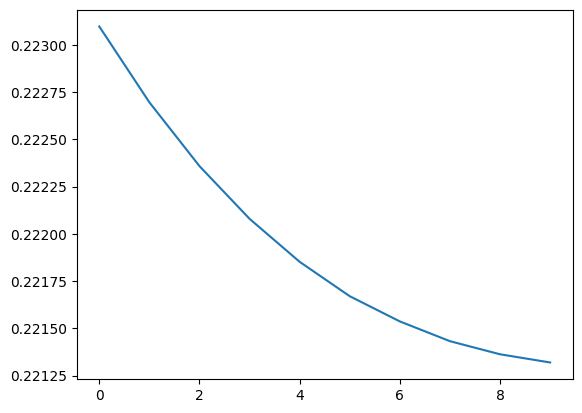

In [40]:
plt.plot(history.history["loss"])

In [41]:
# Stochastic Gradient Descent - as batch size is 1
#this will run 400 times for each epoch & give us the average loss
# During each epoch parameters are updated 400 times
model.compile(loss = "binary_crossentropy", optimizer = "Adam",metrics=["accuracy"])
start = time.time()
history = model.fit(X_scaled, y, epochs = 10, batch_size = 1, validation_split=0.2)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 3s 6ms/step - loss: 0.2252 - accuracy: 0.9031 - val_loss: 0.2089 - val_accuracy: 0.9750
Epoch 2/10
320/320 [==============================] - 1s 4ms/step - loss: 0.2266 - accuracy: 0.9000 - val_loss: 0.2168 - val_accuracy: 0.9500
Epoch 3/10
320/320 [==============================] - 1s 4ms/step - loss: 0.2237 - accuracy: 0.9125 - val_loss: 0.2491 - val_accuracy: 0.9375
Epoch 4/10
320/320 [==============================] - 1s 4ms/step - loss: 0.2248 - accuracy: 0.9000 - val_loss: 0.2267 - val_accuracy: 0.9500
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2247 - accuracy: 0.9031 - val_loss: 0.2212 - val_accuracy: 0.9500
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2236 - accuracy: 0.9062 - val_loss: 0.2479 - val_accuracy: 0.9375
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.9062 - val_loss: 0.2357 - val_accuracy: 0.9500
Epoch 

In [42]:
# For same number of epochs, stochastic gradient descent converges faster compared to batch gradient descent

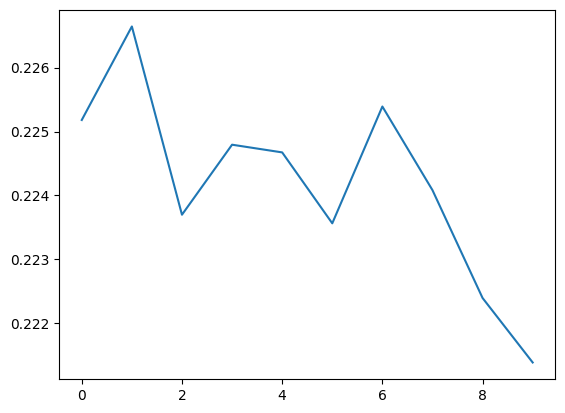

In [43]:
plt.plot(history.history["loss"])

In [44]:
# Mini Batch Gradient Descent
model.compile(loss = "binary_crossentropy", optimizer = "Adam",metrics=["accuracy"])
start = time.time()
history = model.fit(X_scaled, y, epochs = 10, batch_size = 128, validation_split=0.2)
print(time.time()-start)

Epoch 1/10
3/3 [==============================] - 2s 195ms/step - loss: 0.2177 - accuracy: 0.9062 - val_loss: 0.2332 - val_accuracy: 0.9500
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 0.2171 - accuracy: 0.9062 - val_loss: 0.2325 - val_accuracy: 0.9500
Epoch 3/10
3/3 [==============================] - 0s 27ms/step - loss: 0.2169 - accuracy: 0.9062 - val_loss: 0.2325 - val_accuracy: 0.9500
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 0.2167 - accuracy: 0.9062 - val_loss: 0.2320 - val_accuracy: 0.9500
Epoch 5/10
3/3 [==============================] - 0s 38ms/step - loss: 0.2164 - accuracy: 0.9094 - val_loss: 0.2309 - val_accuracy: 0.9500
Epoch 6/10
3/3 [==============================] - 0s 29ms/step - loss: 0.2164 - accuracy: 0.9062 - val_loss: 0.2304 - val_accuracy: 0.9500
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: 0.2165 - accuracy: 0.9031 - val_loss: 0.2300 - val_accuracy: 0.9500
Epoch 8/10
3/3 [==========

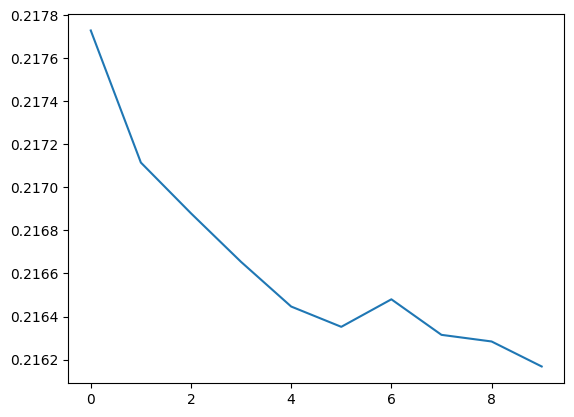

In [45]:
plt.plot(history.history["loss"])